In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import glob
import os

In [2]:
race_name = 'Daytona' + '_race.csv'
path = './data/2025_01_Daytona/'
driver = 'Carson Hocevar'
filtered_lap_value = 70
filtered_speed_value = 110

### Find lap and speed values to filter by

   Unnamed: 0  Lap  LapTime  LapSpeed  RunningPos  Number Manufacturer
0           0    0      NaN       NaN          33      77          Chv
1           1    1   51.972   173.170          36      77          Chv
2           2    2   47.562   189.227          38      77          Chv
3           3    3   48.186   186.776          41      77          Chv
4           4    4   51.880   173.477          41      77          Chv


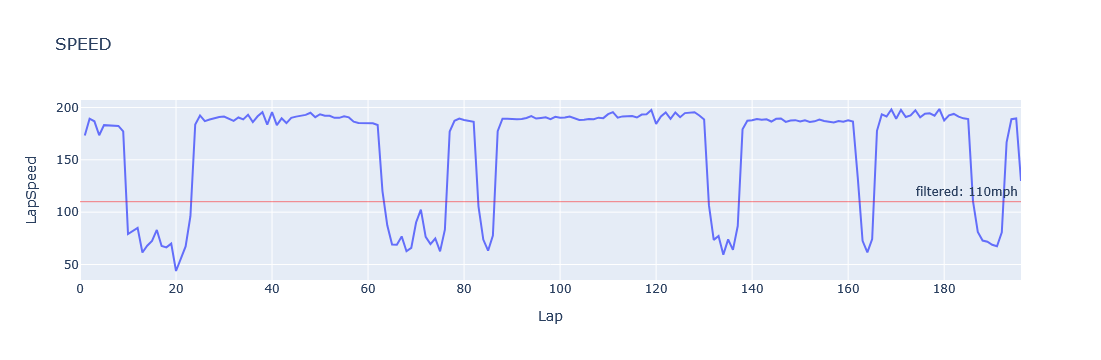

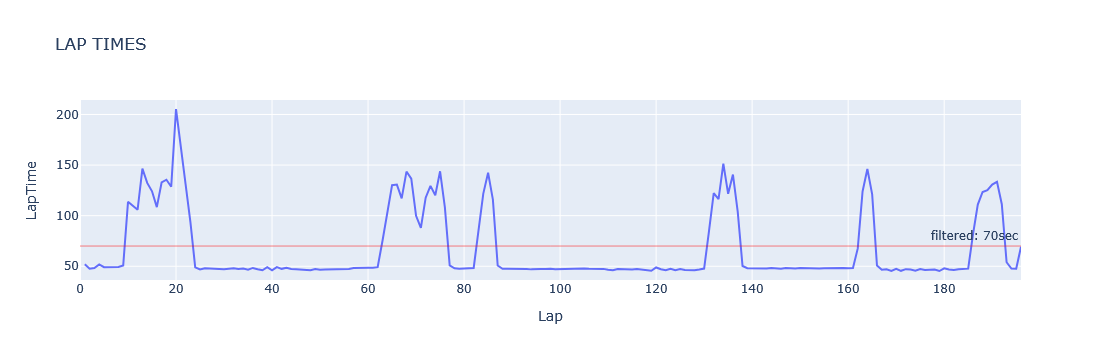

In [3]:
driver_csv = path + driver + '.csv'
df = pd.read_csv(driver_csv)
df = df.drop([11,21])
print(df.head(5))

# check lap_value to use
annotation = 'filtered: ' + str(filtered_speed_value) + 'mph'
fig = px.line(df, x='Lap', y='LapSpeed', title='SPEED')
fig.add_hline(y=filtered_speed_value, line_width=0.5, line_color='red', annotation_text=annotation)
fig.show()

# check speed_value to use
annotation = 'filtered: ' + str(filtered_lap_value) + 'sec'
fig = px.line(df, x='Lap', y='LapTime', title='LAP TIMES')
fig.add_hline(y=filtered_lap_value, line_width=0.5, line_color='red', annotation_text=annotation)
fig.show()

del df

# Collect Summary info for Race_Name.csv

In [4]:
use_csv = path + '*[!_race][!_summary][!_500].csv'

csv_files = glob.glob(use_csv)

df_list = []

for file in csv_files:
    df = pd.read_csv(file)
    # Driver_Name
    Driver_Name = file.lstrip(path).rstrip('.csv')
    # Car number
    Car = df['Number']
    # Manufacturer
    Manu = df['Manufacturer']
    # Start_Pos
    Start_Pos = df['RunningPos'].head(1).values
    # Lowest_Pos
    Lowest_Pos = df['RunningPos'].max()
    # Highest_Pos
    Highest_Pos = df['RunningPos'].min()
    # Ending_Pos
    Ending_Pos = df['RunningPos'].tail(1).values
    # Pos_Change
    Pos_Change = Start_Pos.astype(int) - Ending_Pos
    # Ave running pos
    ARP = round(df['RunningPos'].sum() / len(df['RunningPos']), 4)
    # Fastest_Lap
    filtered_lap = [x for x in df['LapTime'] if x <= filtered_lap_value]
    Fastest_lap = min(filtered_lap)
    # Ave_Lap
    P50_lap = round(np.quantile(filtered_lap, 0.5), 4)
    # 95% quartile lap time
    P95_lap = round(np.quantile(filtered_lap, 0.95), 4)
    # Highest_Speed
    filtered_speed = [x for x in df['LapSpeed'] if x >= filtered_speed_value]
    Highest_speed = max(filtered_speed)
    # 50% quartile speed
    P50_speed = round(np.quantile(filtered_speed, 0.5), 4)
    # 95% quartile speed
    P95_speed = round(np.quantile(filtered_speed, 0.95), 4)

    # combine all into main race csv
    data = {'Driver_Name': Driver_Name,'Start_Pos': Start_Pos,'Lowest_Pos': Lowest_Pos,'Highest_Pos': Highest_Pos,'Ending_Pos': Ending_Pos,'Pos_Change': Pos_Change,'ARP': ARP,'Fastest_Lap': Fastest_lap,'P50_lap': P50_lap,'P95_lap': P95_lap,'Highest_speed': Highest_speed,'P50_speed': P50_speed,'P95_speed': P95_speed}
    # append dataframe to the list
    df_list.append(data)

race_data = pd.DataFrame(df_list)


# clean Start_Pos
clean_start_pos = race_data['Start_Pos'].astype(str)
clean_start_pos = clean_start_pos.str.strip('[]')

# clean Ending_Pos
clean_end_pos = race_data['Ending_Pos'].astype(str)
clean_end_pos = clean_end_pos.str.strip('[]')

# clean Pos_Change
clean_pos_change = race_data['Pos_Change'].astype(str)
clean_pos_change = clean_pos_change.str.strip('[]')

race_data['Start_Pos'] = clean_start_pos
race_data['Ending_Pos'] = clean_end_pos
race_data['Pos_Change'] = clean_pos_change
print(race_data.head())

# export as csv
export_csv = path + race_name

#race_data.to_csv(export_csv)

KeyError: 'Number'